**Import Librairies**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
import warnings
warnings.filterwarnings("ignore")

**Import dataset**

In [3]:
salary_df = pd.read_csv(r'C:\Users\elsaw\OneDrive\Bureau\Machine Learning\Linear Regression\salary.csv')

In [4]:
salary_df.head()

,YearsExperience,Salary,age,company_change,type
0,1.1,39343,21,1,junior
1,1.3,46205,31,0,middle
2,1.5,37731,29,1,middle
3,2.0,43525,30,1,middle
4,2.2,39891,27,1,middle


**Define x and y**

We are trying to predict wages with the years of experience:

In [6]:
x = np.array(salary_df['YearsExperience'])
y = np.array(salary_df['Salary'])

**Split the dataset in training set and test set**

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [10]:
m = 0.1
c = 0.01
alpha = 0.01
n = 4000
for i in range(n):
    slope = 0
    intercept = 0
    for j in range(len(x_train)):
        intercept += ((m*x_train[j]+c)-y_train[j])
        slope += ((m*x_train[j]+c)-y_train[j])*x_train[j]
    c -= alpha*(intercept/len(x_train))
    m -= alpha*(slope/len(x_train))

In [11]:
print(f"slope is {m}")
print(f"intercept is {c}")

slope is 9361.138245453867
intercept is 26771.971017947373


**Predict the test set results**

In [13]:
y_pred = np.dot(m,x_test)+c
print(y_pred)

[ 40813.67838613 123191.69494612  65152.63782431  63280.41017522
 115702.78434976 108213.8737534  116638.8981743   64216.52399976
  76386.00371885]


**Evaluate the model**

In [16]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import explained_variance_score

In [18]:
print(mean_squared_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))
print(mean_absolute_error(y_test,y_pred))
print(explained_variance_score(y_test,y_pred))
print(r2_score(y_test,y_pred))

23363423.807577625
4833.572571874516
3736.575742648381
0.9772923043644067
0.9741067163367385


**Plot the results**

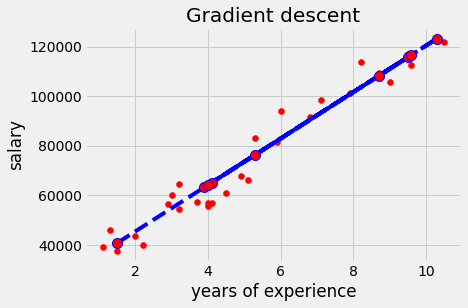

In [15]:
plt.plot(x_test,y_pred,marker='o',color='blue',markerfacecolor='red',markersize=10,linestyle='dashed')
plt.scatter(x,y,marker='o',color='red')
plt.xlabel("years of experience")
plt.ylabel("salary")
plt.title("Gradient descent")
plt.show()